## Import Packages

In [1]:
import os
import sys
import numpy as np
import errno

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

import pandas as pd
import random as rn
from itertools import cycle
import time
from collections import OrderedDict

In [2]:
from looti import emulatorpaths as epath

#from looti  import tools as too
from looti  import interpolators as itp

from looti import dataplotters as dtp

from looti import dictlearn as dcl

from looti import datahandle as dhl

#sns.set()

In [3]:
from looti import read_file as rf

In [4]:
%matplotlib inline

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Run Parameters

## Import Data

The user must provide the folder where the data are stored : Datafolder.
It is expected that inside this folder, the data are organised in the following way :
- One folder per parameters
- These folders must contain the names/abreviations and values of the parameters used within its name.  
- The parameters'names must be seperated by a character e.g : _ , -- , ;
- Each of these folders contains files where is stored the matter power spectrum or ratio at given redshifts.
- The name of these files should contains the snapshot/redshift

Considering the following path as an exemple : MassiveNus/mnv0.00000_om0.30000_As2.1000/powerspec_tot_034.txt
- Datafolder is MassiveNus
- Parameters names are mnv,om,As and they are separated by : " _ " 
- The folder mnv0.00000_om0.30000_As2.1000 contains the power matter spetrum for these parameters for different redshift e.g powerspec_tot_034.txt for snapshot "034"



Indicate the name path of the datafolder :

# Read the parameters names and seperation

The following function will read the first file within the datafolder. It will assume that this file is a relevant example. As explained above this file should contains the name of the parameters seperated by a character and the values of the parameters.

The function will asks the user to provide the names of the parameters and the seperations used. 

#  Construct the frame 

The following function will construct the dataframe.
If the function ask_param has been runned the user should only change the following parameters :
- feature_filename : the begining of the files'name containing the values of matter power spectrum/ratio
- filename_format : the format of the files'name containing the values of matter power spectrum/ratio
- grid_pos : the column which contains the grid, e.g, grid_pos=0 would assume that the grid corresponds to the first column
- feature_pos=1 : the column which contains matter power spectrum/ratio, e.g feature_pos=1 would assume that the features are in the second column.


In [10]:
import yaml
with open(r'../fr_config.yaml') as file:
    doc = yaml.load(file, Loader=yaml.FullLoader)
doc
#yaml.load("../config_read.yaml", Loader=yaml.FullLoader)

{'datafolder': '../../SimulationData/F_R_Peaks/',
 'feature_filename': 'Peaks_KN_s1_b020_',
 'filename_format': 'txt',
 'LCDM_mode': False,
 'LCDM_folder': None,
 'use_reference': False,
 'reference_folder': None,
 'grid_pos': 0,
 'feature_pos': 1,
 'param_str_array': ['logfR0', 'mv'],
 'sep_param': '_',
 'sep_param_value': None,
 'starting_row': 0,
 'end_row': None,
 'redshift_digit': 5,
 'redshift_in_header': True}

In [11]:
doc["redshift_in_header"]

True

In [12]:
####Run to construct the database
from looti import read_file as rf
framework=rf.Frame_Constructor(path_config_file = "../fr_config.yaml")
data = framework.create_DataFrame()
%matplotlib inline

%load_ext autoreload
%autoreload 2
%reload_ext autoreload
#data_frame=rf.create_DataFrame(datafolder,["F"], "_", None,
                     #feature_filename=feature_filename, filename_format=filename_format,                     
                    # grid_pos=grid_pos, feature_pos=feature_pos)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
data

0   \
noise_model redshift parameter_1 parameter_1_value parameter_2 parameter_2_value             
theo        0.50     logfR0      -5.0              mv          0.15               0.417969   
                                 -11.0             mv          0.15               0.335938   
                                 -6.0              mv          0.06               0.382812   
                                 -5.0              mv          0.1                0.398438   
                                 -4.0              mv          0.3                0.347656   
                                 -6.0              mv          0.1                0.351562   
k_grid                                                                                -1.8   

                                                                                       1   \
noise_model redshift parameter_1 parameter_1_value parameter_2 parameter_2_value            
theo        0.50     logfR0      -5.0              mv          0.15               1.69531   
                                 -11.0             mv          0.15               1.60938   
                                 -6.0              mv          0.06               1.67188   
                                 -5.0              mv          0.1                1.69531   
                                 -4.0              mv          0.3                1.62109   
                                 -6.0              mv          0.1                1.66016   
k_grid                                                                               -1.4   

                                                                                       2   \
noise_model redshift parameter_1 parameter_1_value parameter_2 parameter_2_value            
theo        0.50     logfR0      -5.0              mv          0.15               6.74219   
                                 -11.0             mv          0.15               6.28516   
                                 -6.0              mv          0.06               6.66406   
                                 -5.0              mv          0.1                6.83594   
                                 -4.0              mv          0.3                6.74609   
                                 -6.0              mv          0.1                6.59375   
k_grid                                                                                 -1   

                                                                                       3   \
noise_model redshift parameter_1 parameter_1_value parameter_2 parameter_2_value            
theo        0.50     logfR0      -5.0              mv          0.15               19.2617   
                                 -11.0             mv          0.15               18.5781   
                                 -6.0              mv          0.06               19.2578   
                                 -5.0              mv          0.1                19.5938   
                                 -4.0              mv          0.3                19.6172   
                                 -6.0              mv          0.1                19.2422   
k_grid                                                                               -0.6   

                                                                                       4   \
noise_model redshift parameter_1 parameter_1_value parameter_2 parameter_2_value            
theo        0.50     logfR0      -5.0              mv          0.15               45.2305   
                                 -11.0             mv          0.15               45.2539   
                                 -6.0              mv          0.06               45.4648   
                                 -5.0              mv          0.1                46.0586   
                                 -4.0              mv          0.3                46.0547   
                                 -6.0              mv          0.1          

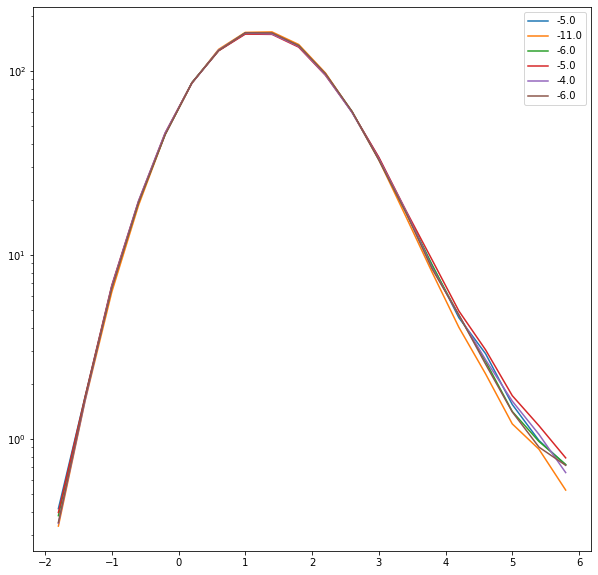

In [30]:
plt.figure(figsize=(10,10))
for x,i in enumerate( data.loc['theo', '0.50'].values):
    
    plt.semilogy(data.loc['k_grid'].values.flatten(),
             i, label=(data.loc['theo', '0.50'].index[x][1]))
    plt.legend()

/local/home/scasas/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """


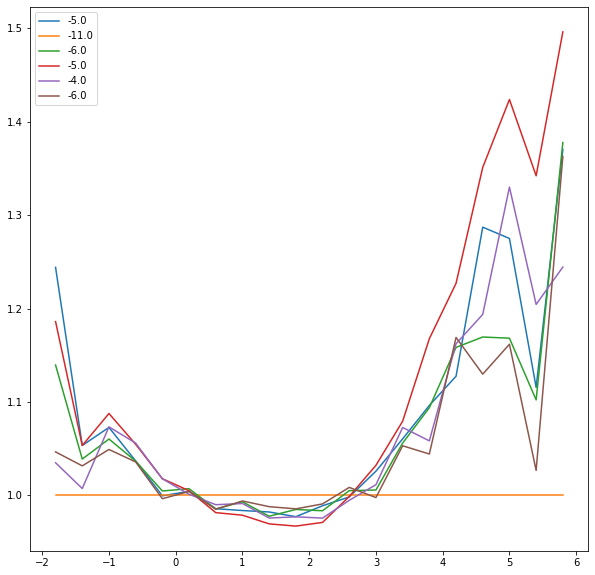

In [32]:
plt.figure(figsize=(10,10))
for x,i in enumerate( data.loc['theo', '0.50'].values):
    
    plt.plot(data.loc['k_grid'].values.flatten(),
             i/data.loc['theo', '0.50','logfR0',-11.0].values.flatten(), label=(data.loc['theo', '0.50'].index[x][1]))
    plt.legend()

In [33]:
data.to_csv('fR-peaks.csv')

In [34]:
data_folder = './'